In [1]:
%pip install statsforecast pandas matplotlib ipywidgets widgetsnbextension -qU

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
import tqdm as notebook_tqdm

In [3]:
sample_dataset = "https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv"

df = pd.read_csv(sample_dataset, parse_dates = ["ds"])
df.head()

,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


In [4]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

sf = StatsForecast(
    models = [AutoARIMA(season_length = 12)],
    freq = 'M'
)

sf.fit(df)

StatsForecast(models=[AutoARIMA])

In [5]:
forecast_df = sf.predict(h = 12, level = [90])
forecast_df.tail()

c:\000 - GenAI - PANAM\demonstrations\timeseries\env\Lib\site-packages\utilsforecast\processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\000 - GenAI - PANAM\demonstrations\timeseries\env\Lib\site-packages\utilsforecast\processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\000 - GenAI - PANAM\demonstrations\timeseries\env\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
unique_id,,,,
AirPassengers,1961-07-31,633.230774,589.730652,676.730896
AirPassengers,1961-08-31,535.230774,489.260010,581.201599
AirPassengers,1961-09-30,488.230804,439.915619,536.545959
AirPassengers,1961-10-31,417.230804,366.679810,467.781799
AirPassengers,1961-11-30,459.230804,406.538788,511.922821


c:\000 - GenAI - PANAM\demonstrations\timeseries\env\Lib\site-packages\statsforecast\core.py:1447: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


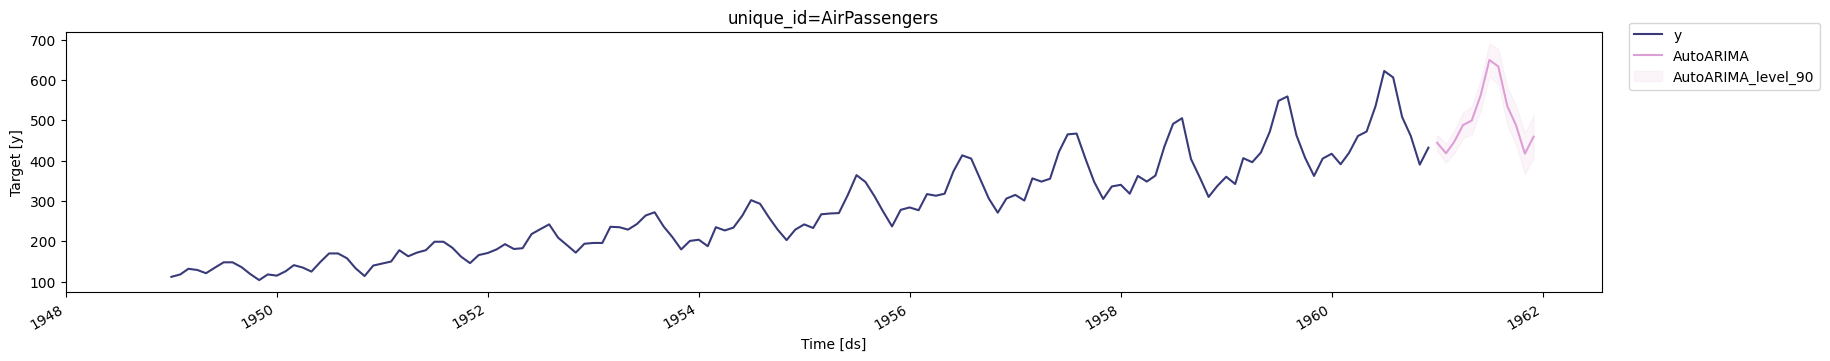

In [6]:
sf.plot(df, forecast_df, level = [90])